In [1]:
"""


 <<< 4.5 File Input with Output Arrays >>>



"""

'\n\n\n <<< 4.5 File Input with Output Arrays >>>\n\n\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=12345)

In [3]:
arr = np.arange(10)

In [4]:
np.save("some_array", arr)

In [5]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
np.savez("array_archive.npz", a=arr, b=arr)

In [7]:
arch = np.load("array_archive.npz")

In [8]:
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [10]:
arch2 = np.load("arrays_compressed.npz")

In [11]:
arch2["a"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
"""


 <<< 4.6 Linear Algebra  >>>



"""

'\n\n\n <<< 4.6 Linear Algebra  >>>\n\n\n\n'

In [13]:
x = np.array([[1., 2., 3.], [4.,5.,6.]])

In [14]:
y = np.array([[6., 23.],[-1, 7], [8, 9]])

In [15]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [16]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [17]:
x.T

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [18]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [19]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [20]:
y.dot(x)

array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

In [21]:
np.dot(y,x)

array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

In [22]:
x @ np.ones(3)

array([ 6., 15.])

In [23]:
from numpy.linalg import inv, qr

In [24]:
X = rng.standard_normal((5, 5,))

In [25]:
mat = X.T @ X

In [26]:
mat

array([[ 9.83867527,  1.04334204,  0.24651754,  0.04017965,  0.16391486],
       [ 1.04334204,  5.11794735, -3.98521413,  0.99264687,  3.27464142],
       [ 0.24651754, -3.98521413,  4.15026075, -2.41299778, -2.74788646],
       [ 0.04017965,  0.99264687, -2.41299778,  3.97263789, -0.04472489],
       [ 0.16391486,  3.27464142, -2.74788646, -0.04472489,  6.01956209]])

In [27]:
inv(mat)

array([[ 0.15548538, -0.36723081, -0.52638547, -0.2300642 , -0.04646089],
       [-0.36723081,  2.54917814,  3.47827334,  1.48196722,  0.22206454],
       [-0.52638547,  3.47827334,  5.46389554,  2.46214396,  0.63467543],
       [-0.2300642 ,  1.48196722,  2.46214396,  1.38302896,  0.33430132],
       [-0.04646089,  0.22206454,  0.63467543,  0.33430132,  0.33879566]])

In [28]:
(mat @ inv(mat)).round()

array([[ 1., -0.,  0.,  0., -0.],
       [ 0.,  1., -0., -0., -0.],
       [-0.,  0.,  1., -0.,  0.],
       [-0.,  0.,  0.,  1.,  0.],
       [ 0.,  0., -0., -0.,  1.]])

In [29]:
"""


 <<< 4.6 Example: Random Walks >>>



"""

'\n\n\n <<< 4.6 Example: Random Walks >>>\n\n\n\n'

In [30]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend

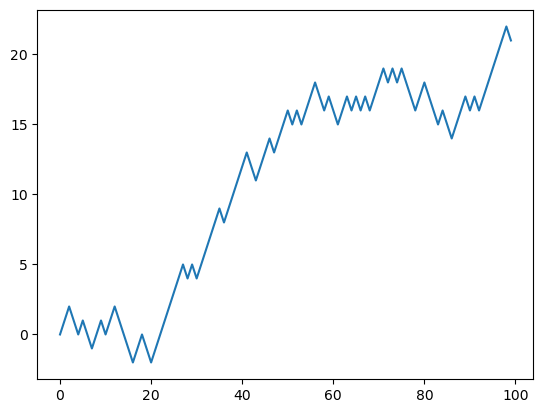

In [31]:
plt.plot(walk[:100]) # Graph for pure-Python method.

In [32]:
nsteps = 1000

In [33]:
rng = np.random.default_rng(seed=12345) # fresh random generator

In [34]:
draws = rng.integers(0, 2, size=nsteps)

In [35]:
steps = np.where(draws == 0, 1, -1)

In [36]:
walk = steps.cumsum()

In [37]:
walk.min()

-8

In [38]:
walk.max()

50

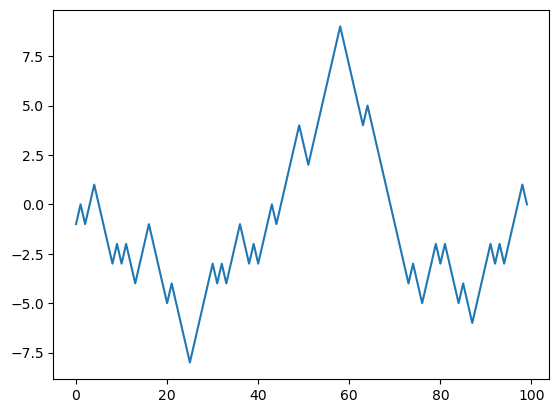

In [39]:
plt.plot(walk[:100])

In [40]:
(np.abs(walk) >= 10).argmax()

155

In [42]:
# Simulating many random walks at once

In [43]:
nwalks = 5000

In [44]:
nsteps = 1000

In [47]:
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1

In [48]:
steps = np.where(draws > 0, 1, -1)

In [50]:
walks = steps.cumsum(axis=1)

In [51]:
walks

array([[  1,   2,   1, ..., -24, -25, -26],
       [ -1,   0,  -1, ...,  -2,  -1,   0],
       [  1,   0,   1, ..., -22, -23, -24],
       ...,
       [  1,   0,   1, ...,   0,   1,   0],
       [ -1,  -2,  -3, ...,  78,  77,  78],
       [  1,   2,   1, ..., -42, -41, -40]])

In [52]:
walks.max()

143

In [55]:
walks.min()

-125

In [57]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [58]:
hits30

array([ True, False,  True, ..., False,  True,  True])

In [62]:
hits30.sum() # Number of walks that hit 30 or -30

3314

In [63]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

In [64]:
crossing_times

array([897, 187, 607, ..., 497, 363, 337])

In [65]:
crossing_times.mean()

503.8135184067592

In [66]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))

In [67]:
draws

array([[ 0.25255254,  0.02237851,  0.56152194, ..., -0.32402054,
         0.17136955,  0.43201751],
       [ 0.20229843, -0.33232789,  0.480806  , ...,  0.15222382,
        -0.65893623,  0.04270046],
       [ 0.10638631,  0.19632213,  0.02657526, ...,  0.23038594,
        -0.50629087,  0.35575323],
       ...,
       [-0.02059152,  0.29333161,  0.19695568, ...,  0.14909193,
         0.12535504,  0.13258885],
       [ 0.27560059,  0.18019157, -0.06697167, ...,  0.09757493,
        -0.05430105,  0.41164409],
       [-0.30335954, -0.04538402,  0.16916437, ...,  0.20218806,
        -0.05606116, -0.18746791]])

In [68]:
steps = np.where(draws > 0, 1, -1)

In [69]:
walks = steps.cumsum(axis=1)

In [70]:
walks

array([[  1,   2,   3, ..., -74, -73, -72],
       [  1,   0,   1, ...,  18,  17,  18],
       [  1,   2,   3, ...,  28,  27,  28],
       ...,
       [ -1,   0,   1, ...,  12,  13,  14],
       [  1,   2,   1, ...,  32,  31,  32],
       [ -1,  -2,  -1, ..., -46, -47, -48]])

In [73]:
walks.max()

117

In [74]:
walks.min()

-118

In [78]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [76]:
hits30

array([ True, False,  True, ..., False,  True,  True])

In [80]:
hits30.sum()

3443

In [85]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

In [86]:
crossing_times

array([223, 467, 885, ..., 467, 821, 753])

In [87]:
crossing_times.mean()

505.1225675283183